# Part 1

In [1]:
!pip install --upgrade --no-cache-dir gdown
!gdown 11wi71E9PppwbkvUnk0LLPbQ9gprklqLe

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From: https://drive.google.com/uc?id=11wi71E9PppwbkvUnk0LLPbQ9gprklqLe
To: /content/data_banknote_authentication.txt
100% 46.4k/46.4k [00:00<00:00, 69.8MB/s]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(r'/content/data_banknote_authentication.txt')
headerlist = ["1'st feature", "2'nd feature", "3'rd feature", "4'th feature", "target"]
data.to_csv('/content/data_banknote_authentication.csv', header=headerlist, index=False)
df = pd.read_csv('/content/data_banknote_authentication.csv')
df

,1'st feature,2'nd feature,3'rd feature,4'th feature,target
0,4.54590,8.16740,-2.4586,-1.46210,0
1,3.86600,-2.63830,1.9242,0.10645,0
2,3.45660,9.52280,-4.0112,-3.59440,0
3,0.32924,-4.45520,4.5718,-0.98880,0
4,4.36840,9.67180,-3.9606,-3.16250,0
...,...,...,...,...,...
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1


# Part 2

In [4]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

df = shuffle(df, random_state=93)
df

,1'st feature,2'nd feature,3'rd feature,4'th feature,target
1291,-0.76794,3.45980,-3.44050,-3.427600,1
380,5.41880,10.14570,-4.08400,-3.699100,0
852,-3.13660,0.42212,2.62250,-0.064238,1
1345,1.25720,4.87310,-5.28610,-5.874100,1
1194,-1.97250,2.88250,-2.30860,-2.372400,1
...,...,...,...,...,...
560,-0.33729,-0.64976,7.66590,0.723260,0
1109,-3.89520,3.81570,-0.31304,-3.819400,1
207,2.10590,7.60460,-0.47755,-1.846100,0
1176,-0.89542,2.02790,-2.36520,-1.274600,1


In [5]:
X = df[["1'st feature", "2'nd feature", "3'rd feature", "4'th feature"]].values

y = df[["target"]].values
X ,y

(array([[-0.76794 ,  3.4598  , -3.4405  , -3.4276  ],
        [ 5.4188  , 10.1457  , -4.084   , -3.6991  ],
        [-3.1366  ,  0.42212 ,  2.6225  , -0.064238],
        ...,
        [ 2.1059  ,  7.6046  , -0.47755 , -1.8461  ],
        [-0.89542 ,  2.0279  , -2.3652  , -1.2746  ],
        [ 4.8368  , 10.0132  , -4.3239  , -4.3276  ]]),
 array([[1],
        [0],
        [1],
        ...,
        [0],
        [1],
        [0]]))

In [6]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.2, random_state=93)
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((1096, 4), (275, 4), (1096, 1), (275, 1))

# Part 3

## Logistic Regression Model

### Sigmoid

In [7]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [8]:
def logistic_regression(x, w):
  y_hat = sigmoid(x @ w)
  return y_hat

### Binary Cross Entropy(BCE)

In [9]:
def bce(y, y_hat):
  loss = -(np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))
  return loss

### Gradient

In [10]:
def gradient(x, y, y_hat):
  grads = (x.T @ (y_hat-y))/len(y)
  return grads

### Gradient Descent

In [11]:
def gradient_descent(w, eta, grads):
  w -= eta*grads
  return w

### Accuracy

In [12]:
def accuracy(y, y_hat):
  acc = np.sum(y == np.round(y_hat))/len(y)
  return acc

### Train

In [13]:
x_train = np.hstack((np.ones((len(x_train), 1)), x_train))
x_train.shape

(1096, 5)

In [14]:
m = 4 # number of features
w = np.random.randn(m+1, 1)
print(w.shape)

eta = 0.01 # learning rate
n_epochs = 4500 # number of epochs

(5, 1)


In [15]:
error_hist = []

for epoch in range(n_epochs):
  # predictions
  y_hat = logistic_regression(x_train, w)

  # loss
  e = bce(y_train, y_hat)
  error_hist.append(e)

  # gradients
  grads = gradient(x_train, y_train, y_hat)

  # gradient descent
  w = gradient_descent(w, eta, grads)

  if (epoch+1) % 100 ==0:
    print(f'Epoch={epoch}, \t E={e:.4},\t w={w.T[0]}')

Epoch=99, 	 E=0.483,	 w=[ 0.73246021 -1.4485933  -0.37492168  0.29757747  0.02989807]
Epoch=199, 	 E=0.1755,	 w=[ 0.73792781 -1.41606648 -0.34016641 -0.22829349 -0.00873157]
Epoch=299, 	 E=0.1185,	 w=[ 0.75902331 -1.38282611 -0.39869088 -0.44897037 -0.01410169]
Epoch=399, 	 E=0.1019,	 w=[ 0.78875201 -1.37180797 -0.46010358 -0.55489939 -0.02381256]
Epoch=499, 	 E=0.09374,	 w=[ 0.82222886 -1.37305017 -0.51270089 -0.61704767 -0.0401419 ]
Epoch=599, 	 E=0.08829,	 w=[ 0.8566244  -1.38012137 -0.55582174 -0.66139063 -0.05915282]
Epoch=699, 	 E=0.08409,	 w=[ 0.89067857 -1.39014191 -0.59190675 -0.69682825 -0.07820625]
Epoch=799, 	 E=0.08065,	 w=[ 0.9238741  -1.40174467 -0.62298239 -0.72695392 -0.09610632]
Epoch=899, 	 E=0.07774,	 w=[ 0.95601802 -1.41421241 -0.65038039 -0.75353299 -0.11241639]
Epoch=999, 	 E=0.0752,	 w=[ 0.98706262 -1.42714233 -0.67496936 -0.77755625 -0.12705301]
Epoch=1099, 	 E=0.07297,	 w=[ 1.01702596 -1.44029714 -0.69733621 -0.79963151 -0.14008813]
Epoch=1199, 	 E=0.07098,	 w

<ipython-input-9-b0d2f89eca7a>:2: RuntimeWarning: divide by zero encountered in log
  loss = -(np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))
<ipython-input-9-b0d2f89eca7a>:2: RuntimeWarning: invalid value encountered in multiply
  loss = -(np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))


Epoch=1699, 	 E=0.0634,	 w=[ 1.17711588 -1.51862666 -0.80195498 -0.90698321 -0.19253506]
Epoch=1799, 	 E=0.06221,	 w=[ 1.20103175 -1.53122667 -0.81606255 -0.92205336 -0.19818073]
Epoch=1899, 	 E=0.06109,	 w=[ 1.2242842  -1.54365878 -0.82949553 -0.93653951 -0.20320725]
Epoch=1999, 	 E=0.06005,	 w=[ 1.24691193 -1.55591911 -0.84232046 -0.95049372 -0.20768699]
Epoch=2099, 	 E=0.05907,	 w=[ 1.26895024 -1.56800584 -0.85459431 -0.96396049 -0.21168293]
Epoch=2199, 	 E=0.05815,	 w=[ 1.29043135 -1.57991864 -0.86636619 -0.97697828 -0.21524992]
Epoch=2299, 	 E=0.05727,	 w=[ 1.31138474 -1.59165829 -0.87767887 -0.98958069 -0.21843581]
Epoch=2399, 	 E=0.05645,	 w=[ 1.33183741 -1.60322638 -0.88856979 -1.00179732 -0.22128241]
Epoch=2499, 	 E=0.05566,	 w=[ 1.3518142  -1.61462509 -0.89907195 -1.01365443 -0.22382637]
Epoch=2599, 	 E=0.05491,	 w=[ 1.37133795 -1.62585707 -0.90921461 -1.02517549 -0.22609984]
Epoch=2699, 	 E=0.0542,	 w=[ 1.39042978 -1.63692525 -0.91902382 -1.03638156 -0.22813114]
Epoch=2799, 

### Loss fuction

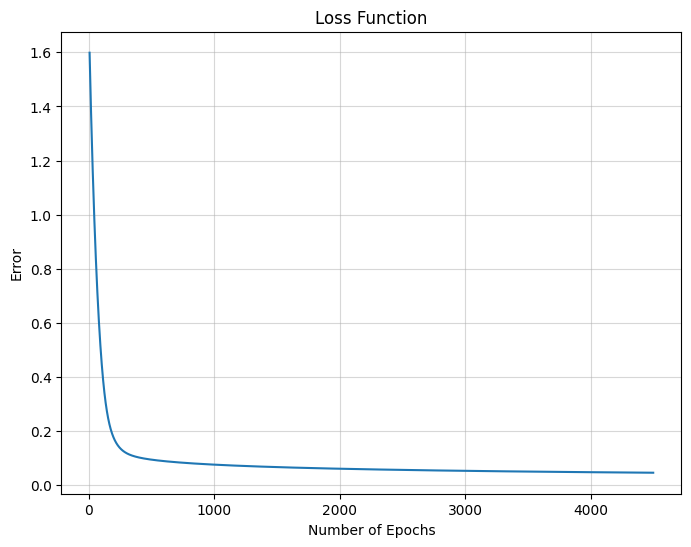

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(error_hist)
plt.xlabel("Number of Epochs")
plt.ylabel("Error")
plt.title('Loss Function')
plt.grid(alpha=0.5)

### Test

In [17]:
x_test = np.hstack((np.ones((len(x_test), 1)), x_test))
x_test.shape

(275, 5)

In [18]:
y_hat = logistic_regression(x_test, w)
accuracy(y_test, y_hat)

0.9818181818181818

# Part 4

In [20]:
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)

normalized_X = (X - mean) / std
normalized_X

array([[-0.42208972,  0.26292336, -1.12362946, -1.06401182],
       [ 1.75522238,  1.40265256, -1.27298425, -1.19324112],
       [-1.25569709, -0.25490261,  0.28357818,  0.53689021],
       ...,
       [ 0.58930668,  0.96947739, -0.43593593, -0.31124522],
       [-0.46695402,  0.01883083, -0.87405493, -0.03922113],
       [ 1.55039792,  1.3800656 , -1.32866446, -1.49239623]])

# Part 5

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train , x_test , y_train , y_test = train_test_split(normalized_X , y , test_size = 0.2, random_state=93)
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((1096, 4), (275, 4), (1096, 1), (275, 1))

## Logistic Regression Model

### Sigmoid

In [23]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [24]:
def logistic_regression(x, w):
  y_hat = sigmoid(x @ w)
  return y_hat

### Binary Cross Entropy(BCE)

In [25]:
def bce(y, y_hat):
  loss = -(np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))
  return loss

### Gradient

In [26]:
def gradient(x, y, y_hat):
  grads = (x.T @ (y_hat-y))/len(y)
  return grads

### Gradient Descent

In [27]:
def gradient_descent(w, eta, grads):
  w -= eta*grads
  return w

### Accuracy

In [28]:
def accuracy(y, y_hat):
  acc = np.sum(y == np.round(y_hat))/len(y)
  return acc

### Train

In [29]:
x_train = np.hstack((np.ones((len(x_train), 1)), x_train))
x_train.shape

(1096, 5)

In [30]:
m = 4 # number of features
w = np.random.randn(m+1, 1)
print(w.shape)

eta = 0.01 # learning rate
n_epochs = 4500 # number of epochs

(5, 1)


In [31]:
error_hist = []

for epoch in range(n_epochs):
  # predictions
  y_hat = logistic_regression(x_train, w)

  # loss
  e = bce(y_train, y_hat)
  error_hist.append(e)

  # gradients
  grads = gradient(x_train, y_train, y_hat)

  # gradient descent
  w = gradient_descent(w, eta, grads)

  if (epoch+1) % 100 ==0:
    print(f'Epoch={epoch}, \t E={e:.4},\t w={w.T[0]}')

Epoch=99, 	 E=1.509,	 w=[ 0.4940287   1.18201844 -0.61968269 -0.52009139  1.2066339 ]
Epoch=199, 	 E=1.092,	 w=[ 0.34361233  0.63521869 -0.74430033 -0.45553018  0.93369923]
Epoch=299, 	 E=0.7882,	 w=[ 0.21576257  0.17081704 -0.82064911 -0.44047048  0.68171816]
Epoch=399, 	 E=0.5881,	 w=[ 0.11537005 -0.20585926 -0.86960595 -0.45797321  0.47249242]
Epoch=499, 	 E=0.4662,	 w=[ 0.03916572 -0.50153029 -0.91022227 -0.49134796  0.31535834]
Epoch=599, 	 E=0.3931,	 w=[-0.0197506  -0.73271691 -0.95146996 -0.53117009  0.20480777]
Epoch=699, 	 E=0.3469,	 w=[-0.06680349 -0.91752086 -0.99494748 -0.57359409  0.12863529]
Epoch=799, 	 E=0.3154,	 w=[-0.10545887 -1.06980858 -1.03986488 -0.61717974  0.07595635]
Epoch=899, 	 E=0.2922,	 w=[-0.13796817 -1.19882783 -1.0852491  -0.66129872  0.03920576]
Epoch=999, 	 E=0.2742,	 w=[-0.16585402 -1.31061907 -1.13040444 -0.70559917  0.01344101]
Epoch=1099, 	 E=0.2596,	 w=[-0.19017834 -1.40922198 -1.17489832 -0.74984264 -0.00457709]
Epoch=1199, 	 E=0.2473,	 w=[-0.211

### Loss fuction

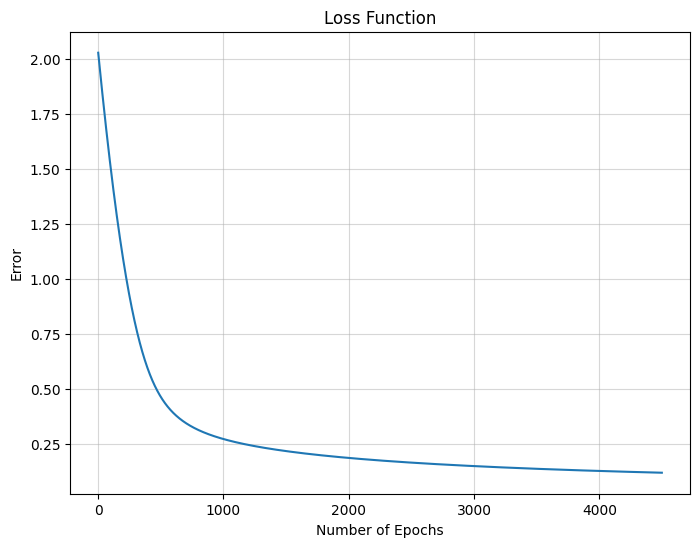

In [32]:
plt.figure(figsize=(8, 6))
plt.plot(error_hist)
plt.xlabel("Number of Epochs")
plt.ylabel("Error")
plt.title('Loss Function')
plt.grid(alpha=0.5)

### Test

In [33]:
x_test = np.hstack((np.ones((len(x_test), 1)), x_test))
x_test.shape

(275, 5)

In [34]:
y_hat = logistic_regression(x_test, w)
accuracy(y_test, y_hat)

0.9745454545454545

In [35]:
# Number of desired samples
num_samples = 5
# Select 5 random indices from the test data
random_indices = np.random.choice(len(x_test), num_samples, replace=False)

# Data samples corresponding to the selected indices
random_samples = x_test[random_indices]
y_random_samples = y_test[random_indices]

y_hat_random_samples = logistic_regression(random_samples, w)

# Display the model predictions and real targets for the selected samples
print("Model Predictions for the Selected Samples:")
print(y_hat_random_samples)

print("Real Targets for the Selected Samples:")
print(y_random_samples)

Model Predictions for the Selected Samples:
[[0.01987476]
 [0.94394688]
 [0.88113615]
 [0.92069731]
 [0.95594452]]
Real Targets for the Selected Samples:
[[0]
 [1]
 [1]
 [1]
 [1]]


# Part 6

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

new_y = pd.DataFrame(y)
new_y.value_counts()

0    761
1    610
dtype: int64

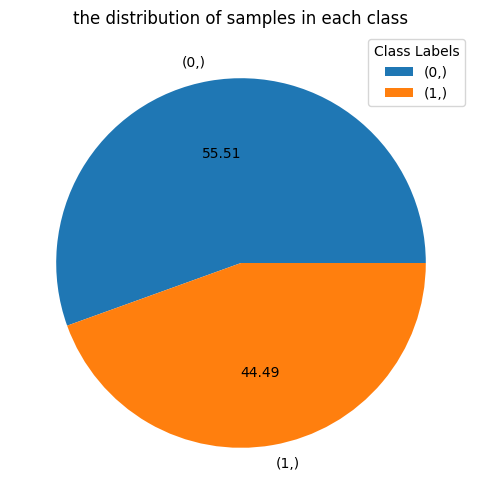

In [37]:
plt.figure(figsize=(8, 6))
new_y.value_counts().plot.pie(autopct = "%.2f")
plt.title("the distribution of samples in each class")
plt.legend(labels=new_y.value_counts().index, title="Class Labels", loc="upper right")

In [38]:
! pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [46]:
from imblearn.under_sampling import RandomUnderSampler

y1 = pd.DataFrame(y)
rus = RandomUnderSampler(sampling_strategy=1, random_state=93)
X_res_undersampling , y_res_undersampling = rus.fit_resample(X , y1)
X_res_undersampling.shape , y_res_undersampling.shape

((1220, 4), (1220, 1))

In [47]:
y_res_undersampling.value_counts()

0    610
1    610
dtype: int64

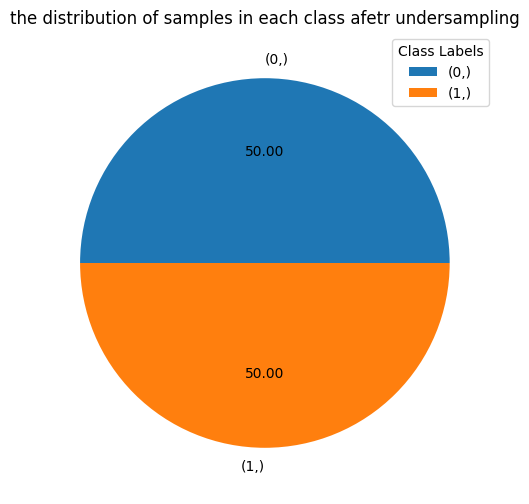

In [48]:
plt.figure(figsize=(8, 6))
y_res_undersampling.value_counts().plot.pie(autopct = '%.2f')
plt.title("the distribution of samples in each class afetr undersampling")
plt.legend(labels=new_y.value_counts().index, title="Class Labels", loc="upper right")

# Part 7

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res_undersampling, y_res_undersampling, test_size=0.2, random_state=93, stratify=y_res_undersampling)

## Logistic Regression

In [51]:
LogReg_classifier = LogisticRegression(C=1.0, penalty='l2', solver='sag', max_iter=20000, random_state=93)
LogReg_classifier.fit(X_train, y_train)
y_pred = LogReg_classifier.predict(X_test)
LogReg_train_accuracy = LogReg_classifier.score(X_train, y_train)
LogReg_test_accuracy = LogReg_classifier.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Accuracy

In [52]:
print(f"Logistic Regression Train Accuracy: {LogReg_train_accuracy:.2f}")
print(f"Logistic Regression Test Accuracy: {LogReg_test_accuracy:.2f}")

Logistic Regression Train Accuracy: 0.99
Logistic Regression Test Accuracy: 0.99
